In [2]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from matplotlib import pyplot
import numpy as np
import pandas as pd
import tensorflow as tf
from focal_loss import BinaryFocalLoss
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [3]:
df1=np.transpose(pd.read_csv("HARdatasets\\train\\Inertial Signals\\body_acc_x_train.txt",delim_whitespace=True))
df2=np.transpose(pd.read_csv("HARdatasets\\train\\Inertial Signals\\body_acc_y_train.txt",delim_whitespace=True))
df3=np.transpose(pd.read_csv("HARdatasets\\train\\Inertial Signals\\body_acc_z_train.txt",delim_whitespace=True))
df4=np.transpose(pd.read_csv("HARdatasets\\train\\Inertial Signals\\body_gyro_x_train.txt",delim_whitespace=True))
df5=np.transpose(pd.read_csv("HARdatasets\\train\\Inertial Signals\\body_gyro_y_train.txt",delim_whitespace=True))
df6=np.transpose(pd.read_csv("HARdatasets\\train\\Inertial Signals\\body_gyro_x_train.txt",delim_whitespace=True))
df7=np.transpose(pd.read_csv("HARdatasets\\train\\Inertial Signals\\total_acc_x_train.txt",delim_whitespace=True))
df8=np.transpose(pd.read_csv("HARdatasets\\train\\Inertial Signals\\total_acc_y_train.txt",delim_whitespace=True))
df9=np.transpose(pd.read_csv("HARdatasets\\train\\Inertial Signals\\total_acc_z_train.txt",delim_whitespace=True))

In [4]:
y=pd.read_csv("HARdatasets\\train\\y_train.txt",delim_whitespace=True)
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
train_y = np_utils.to_categorical(encoded_Y)

C:\Users\Rupali\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rupali\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
df=[df1,df2,df3,df4,df5,df6,df7,df8,df9]
train_x=np.transpose(df)
np.shape(train_x)

(7351, 128, 9)

In [6]:
tf1=np.transpose(pd.read_csv("HARdatasets\\test\\Inertial Signals\\body_acc_x_test.txt",delim_whitespace=True))
tf2=np.transpose(pd.read_csv("HARdatasets\\test\\Inertial Signals\\body_acc_y_test.txt",delim_whitespace=True))
tf3=np.transpose(pd.read_csv("HARdatasets\\test\\Inertial Signals\\body_acc_z_test.txt",delim_whitespace=True))
tf4=np.transpose(pd.read_csv("HARdatasets\\test\\Inertial Signals\\body_gyro_x_test.txt",delim_whitespace=True))
tf5=np.transpose(pd.read_csv("HARdatasets\\test\\Inertial Signals\\body_gyro_y_test.txt",delim_whitespace=True))
tf6=np.transpose(pd.read_csv("HARdatasets\\test\\Inertial Signals\\body_gyro_x_test.txt",delim_whitespace=True))
tf7=np.transpose(pd.read_csv("HARdatasets\\test\\Inertial Signals\\total_acc_x_test.txt",delim_whitespace=True))
tf8=np.transpose(pd.read_csv("HARdatasets\\test\\Inertial Signals\\total_acc_y_test.txt",delim_whitespace=True))
tf9=np.transpose(pd.read_csv("HARdatasets\\test\\Inertial Signals\\total_acc_z_test.txt",delim_whitespace=True))

In [7]:
y=pd.read_csv("HARdatasets\\train\\y_train.txt",delim_whitespace=True)
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
train_y = np_utils.to_categorical(encoded_Y)

In [8]:
y=pd.read_csv("HARdatasets\\test\\y_test.txt",delim_whitespace=True)
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
test_y = np_utils.to_categorical(encoded_Y)

In [9]:
tf=[tf1,tf2,tf3,tf4,tf5,tf6,tf7,tf8,tf9]
test_x=np.transpose(tf)
np.shape(test_x)

(2946, 128, 9)

In [10]:
test_x.shape[2]

9

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier


In [12]:
def getModel():
    model = Sequential()
    model.add(LSTM(100, input_shape=(128,9)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss=BinaryFocalLoss(gamma=2), optimizer='adam', metrics=['accuracy'])
    return model


In [13]:
estimator = KerasClassifier(build_fn=getModel, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, train_x, train_y, cv=kfold)
print("accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

accuracy: 94.37% (1.11%)


In [14]:
getModel().summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 100)               44000     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 6)                 606       
Total params: 54,706
Trainable params: 54,706
Non-trainable params: 0
_________________________________________________________________


In [21]:
estimator.fit(train_x,train_y,verbose=0)

In [22]:
pred=estimator.predict(test_x)

In [23]:
from sklearn.metrics import confusion_matrix
test=test_y
true=test.argmax(axis=1)
confusion_matrix(true,pred)

array([[463,  28,   3,   2,   0,   0],
       [ 22, 442,   4,   1,   2,   0],
       [ 14,   9, 394,   0,   3,   0],
       [  1,  21,   0, 380,  88,   1],
       [  2,   3,   0,  66, 460,   0],
       [  0,  14,   0,   0,   0, 523]], dtype=int64)

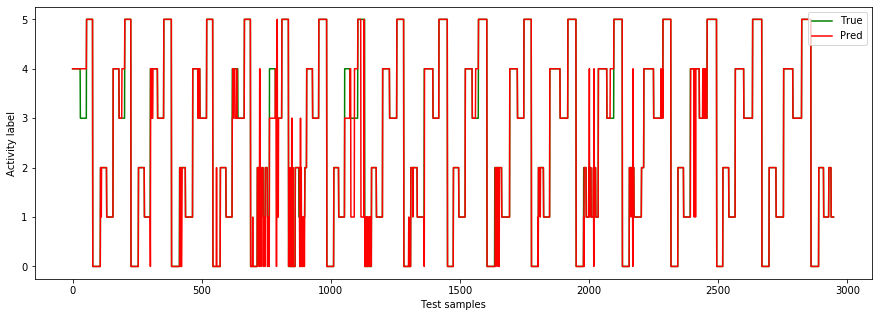

In [24]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,5))
t=np.linspace(0,2946,2946)
plt.plot(t,true,"g")
plt.plot(t,pred,"r")
plt.legend(["True","Pred"],loc="upper right")
plt.xlabel("Test samples")
plt.ylabel("Activity label")
plt.show()

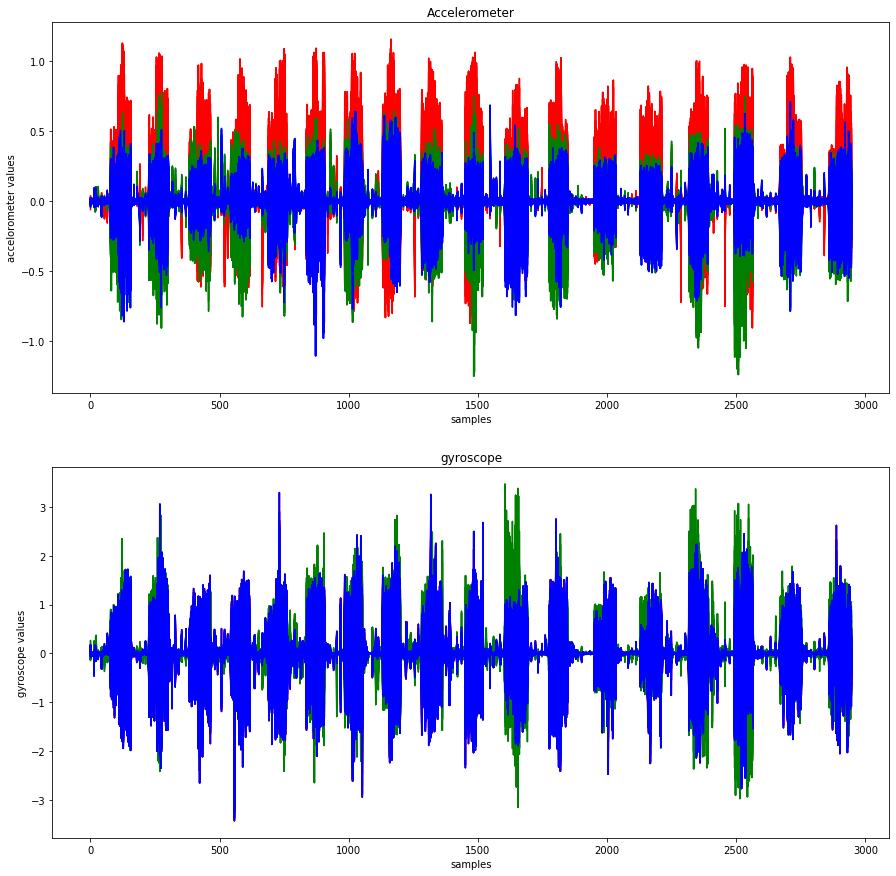

In [25]:
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
ax1.plot(t,np.transpose(tf1),"r")
ax1.plot(t,np.transpose(tf2),"g")
ax1.plot(t,np.transpose(tf3),"b")
ax1.set(title="Accelerometer",xlabel="samples",ylabel="accelorometer values")



ax2.plot(t,np.transpose(tf4),"r",)
ax2.plot(t,np.transpose(tf5),"g")
ax2.plot(t,np.transpose(tf6),"b")
ax2.set(title="gyroscope",xlabel="samples",ylabel="gyroscope values")



plt.show()